## Sleep Efficency Machine Learning

1. 선형 모델과 트리 기반 알고리즘
- 회귀 알고리즘:
  - 선형 회귀 (Linear Regression)
  - 다중 회귀 (Multiple Linear Regression)
- 분류 알고리즘:
  - 로지스틱 회귀 (Logistic Regression)
- 성능 튜닝:
  - GridSearchCV


1. **ID**: 각 시험 과목에 대한 고유 식별자
2. **Age**: 피험자의 연령
3. **Gender**: 남성 또는 여성
4. **Bedtime**: 피험자가 매일 밤 잠자리에 드는 시간
5. **Wakeup time**: 피험자가 매일 아침 깨어나는 시간
6. **Sleep duration**: 피험자가 수면을 취한 총 시간
7. **Sleep efficiency**:  침대에서 보낸 시간 중 실제로 수면에 소요된 시간의 비율
8. **REM sleep percentage**: 렘수면에 소요된 총 수면 시간의 백분율
9. **Deep sleep percentage**: 깊은 숙면에 소요된 총 수면 시간의 백분율
10. **Light sleep percentage**: 가벼운 수면에 소요된 총 수면 시간의 백분율
11. **Awakenings**: 피험자가 밤에 깨어나는 횟수
12. **Caffeine consumption**: 취침 전 24시간 동안 섭취한 카페인의 양(mg)
13. **Alcohol consumption**: 취침 전 24시간 동안 섭취한 알코올의 양(온스)
14. **Smoking status**: 피험자의 흡연 여부
15. **Exercise frequency**: 피험자가 매주 운동하는 횟수

## 가설
1. 나이와 수면 효율이 관련이 있을 것이다.(관련x)
2. **Bedtime** 수면 효율이 관련이 있을 것이다.(관련o)
3. 수면 시간과 수면 효율이 관련이 있을 것이다.(관련x)
4. 카페인 섭취와 수면 효율이 관련이 있을 것이다.(관련x)
5. 알코올 섭취와 수면 효율이 관련이 있을 것이다.(관련o)
6. 흡연 여부와 수면 효율이 관련이 있을 것이다.(관련o)
7. 운동 빈도와 수면 효율이 관련이 있을 것이다.(관련o)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet

import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

## 데이터 이해

In [2]:
data = pd.read_csv('./Sleep_Efficiency.csv')
data.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     438 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

In [4]:
data.describe()

,ID,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,432.000000,427.000000,438.000000,446.000000
mean,226.500000,40.285398,7.465708,0.788916,22.615044,52.823009,24.561947,1.641204,23.653396,1.173516,1.791480
std,130.625419,13.172250,0.866625,0.135237,3.525963,15.654235,15.313665,1.356762,30.202785,1.621377,1.428134
min,1.000000,9.000000,5.000000,0.500000,15.000000,18.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,113.750000,29.000000,7.000000,0.697500,20.000000,48.250000,15.000000,1.000000,0.000000,0.000000,0.000000
50%,226.500000,40.000000,7.500000,0.820000,22.000000,58.000000,18.000000,1.000000,25.000000,0.000000,2.000000
75%,339.250000,52.000000,8.000000,0.900000,25.000000,63.000000,32.500000,3.000000,50.000000,2.000000,3.000000
max,452.000000,69.000000,10.000000,0.990000,30.000000,75.000000,63.000000,4.000000,200.000000,5.000000,5.000000


In [5]:
data.isna().sum()

ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64

## 결측치 처리

In [6]:
# 결측치 제거
data['Awakenings'] = data['Awakenings'].fillna(0)
data['Caffeine consumption'] = data['Caffeine consumption'].fillna(0)
data['Alcohol consumption'] = data['Alcohol consumption'].fillna(0)
data['Exercise frequency'] = data['Exercise frequency'].fillna(0)

In [7]:
data.isna().sum().sum()

0

## 가변수화

In [8]:
data['Gender'] = np.where(data['Gender'] == 'Male', 1, 0) # Male 1, Female 0
data['Smoking status'] = np.where(data['Smoking status'] == 'Yes', 1, 0) # Yes 1, No 0

## 컬럼 수정

In [9]:
# datetime 타입으로 바꿔주기
data['Bedtime'] = pd.to_datetime(data['Bedtime'])
data['Wakeup time'] = pd.to_datetime(data['Wakeup time'])

data['Bedtime_hour'] = data['Bedtime'].dt.hour
data['Bedtime_minute'] = data['Bedtime'].dt.minute

data['Wakeup_time_hour'] = data['Wakeup time'].dt.hour
data['Wakeup_time_minute'] = data['Wakeup time'].dt.minute

data['Sleeping_time'] = (data['Wakeup time'] - data['Bedtime']) / pd.Timedelta(minutes=1)

In [10]:
data['Sleeping_time']

0       360.0
1       420.0
2      -960.0
3       360.0
4       480.0
        ...  
447    -990.0
448   -1080.0
449    -930.0
450   -1020.0
451     450.0
Name: Sleeping_time, Length: 452, dtype: float64

In [11]:
# 수면시간이 음수인 행이 존재함
# 취침시간과 기상시간에 문제가 있음
# 기상할때 하루가 지나있어야하는데 과거로 돌아감...
# 일단 수면시간이 음수인경우 24시간을 더함

In [12]:
data['Sleeping_time'] = data['Sleeping_time'].apply(lambda x: x + 1440 if x < 0 else x)

In [13]:
data.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Bedtime_hour,Bedtime_minute,Wakeup_time_hour,Wakeup_time_minute,Sleeping_time
0,1,65,0,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,1,3.0,1,0,7,0,360.0
1,2,69,1,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,1,3.0,2,0,9,0,420.0
2,3,40,0,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,0,3.0,21,30,5,30,480.0
3,4,40,0,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,1,1.0,2,30,8,30,360.0
4,5,57,1,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,0,3.0,1,0,9,0,480.0


## 불필요한 컬럼 제거
ID, Bedtime, Wakeup time

In [14]:
data.columns

Index(['ID', 'Age', 'Gender', 'Bedtime', 'Wakeup time', 'Sleep duration',
       'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage',
       'Light sleep percentage', 'Awakenings', 'Caffeine consumption',
       'Alcohol consumption', 'Smoking status', 'Exercise frequency',
       'Bedtime_hour', 'Bedtime_minute', 'Wakeup_time_hour',
       'Wakeup_time_minute', 'Sleeping_time'],
      dtype='object')

In [15]:
data = data[[ 'Age', 'Gender', 'Sleep duration',
       'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage',
       'Light sleep percentage', 'Awakenings', 'Caffeine consumption',
       'Alcohol consumption', 'Smoking status', 'Exercise frequency',
       'Bedtime_hour', 'Bedtime_minute', 'Wakeup_time_hour',
       'Wakeup_time_minute', 'Sleeping_time']]

In [16]:
data

,Age,Gender,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Bedtime_hour,Bedtime_minute,Wakeup_time_hour,Wakeup_time_minute,Sleeping_time
0,65,0,6.0,0.88,18,70,12,0.0,0.0,0.0,1,3.0,1,0,7,0,360.0
1,69,1,7.0,0.66,19,28,53,3.0,0.0,3.0,1,3.0,2,0,9,0,420.0
2,40,0,8.0,0.89,20,70,10,1.0,0.0,0.0,0,3.0,21,30,5,30,480.0
3,40,0,6.0,0.51,23,25,52,3.0,50.0,5.0,1,1.0,2,30,8,30,360.0
4,57,1,8.0,0.76,27,55,18,3.0,0.0,3.0,0,3.0,1,0,9,0,480.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,27,0,7.5,0.91,22,57,21,0.0,0.0,0.0,0,5.0,22,0,5,30,450.0
448,52,1,6.0,0.74,28,57,15,4.0,25.0,0.0,0,3.0,21,0,3,0,360.0
449,40,0,8.5,0.55,20,32,48,1.0,0.0,3.0,1,0.0,23,0,7,30,510.0
450,45,1,7.0,0.76,18,72,10,3.0,0.0,0.0,0,3.0,21,0,4,0,420.0


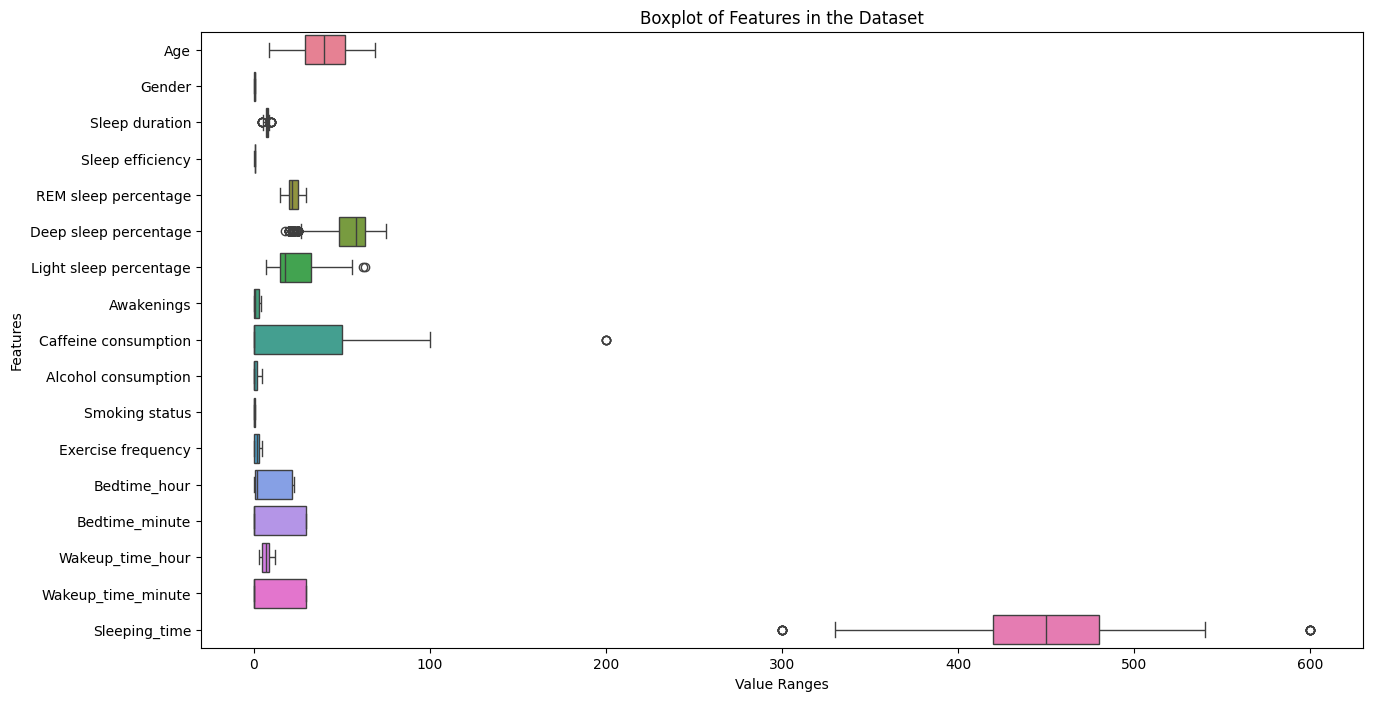

In [17]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=data, orient="h")
plt.title("Boxplot of Features in the Dataset")
plt.xlabel("Value Ranges")
plt.ylabel("Features")
plt.show()

## 테스트 셋 분리

In [18]:
target = 'Sleep efficiency'
x = data.drop(columns=target)
y = data[target]

In [19]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=1)

## 기본 회귀모델

In [20]:
# 모델선언
basic_model = LinearRegression()
# 모델학습
basic_model.fit(x_train, y_train)

LinearRegression()

In [21]:
# 예측
basic_pred = basic_model.predict(x_val)
# 성능평가
print(f'R2 Score : {r2_score(y_val, basic_pred)}')

R2 Score : 0.773402107038782


## 모델 튜닝하기

- fit_intercept: 절편 (True는 포함)
- Ridge: L2 규제, 가중치들의 제곱합을 최소화 하는 것을 제약조건으로 추가하는 기법이다.
  - 릿지 회귀모형에서는 가중치의 모든 원소가 0에 가까워지는 것을 목표로 한다.
- Lasso: L1 규제, 가중치의 절대값의 합을 최소화하는 것을 제약조건으로 추가하는 기법이다.
  - 릿지회귀에서는 가중치가 0에 가까워질 뿐, 실제로 0이 되지는 않는다.
  - 하지만, 라쏘회귀에서는 중요하지 않는 가중치는 0이 될 수도 있다.
- ElasticNet: 엘라스틱넷은 릿지회귀와 가쏘회귀를 결합한 모델이다.
  - L1 규제 비율을 높이면: 모델에 라쏘회귀 특성이 더해져, 일부 feature의 가중치를 0으로 만들 수 있다.
  - L2 규제 비율을 높이면: 릿지회귀 특성이 더해져, 모든 feature의 가중치를 작게 만든다.

## Grid Search cv=5로 했을때(스케일링X)

In [22]:
# 모델 선언
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet()
}

# 각 모델별 하이퍼파라미터 그리드 설정
param_grids = {
    'LinearRegression': {
        'fit_intercept': [True, False]
    },
    'Ridge': {
        'alpha': [0.001, 0.01, 0.1, 1, 10, 100],   # 규제 강도
        'fit_intercept': [True, False],
        'max_iter': [1000, 3000, 5000, 10000]      # 최적화를 위한 최대 반복 횟수
    },
    'Lasso': {
        'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
        'fit_intercept': [True, False],
        'max_iter': [1000, 3000, 5000, 10000]        
    },
    'ElasticNet': {
        'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
        'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],  # L1 규제 비율
        'fit_intercept': [True, False],
        'max_iter': [1000, 3000, 5000, 10000]
    }
}

# 모든 모델에 대해 Grid Search 실행
for model_name, model in models.items():
    print(f"Running Grid Search for {model_name}")
    
    # 모델에 맞는 하이퍼파라미터 그리드 설정
    param_grid = param_grids[model_name]
    
    # GridSearchCV 설정
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
    
    # 모델 학습
    grid_search.fit(x_train, y_train)
    
    # 최적의 파라미터와 점수 출력
    print(f"Best Parameters for {model_name}:", grid_search.best_params_)
    print(f"Best Score for {model_name}:", grid_search.best_score_)

    best_model = grid_search.best_estimator_
    y_val_pred = best_model.predict(x_val)
    
    print(f"R2 Score {model_name}: {r2_score(y_val, y_val_pred)}")
    print("-" * 50)

Running Grid Search for LinearRegression
Best Parameters for LinearRegression: {'fit_intercept': True}
Best Score for LinearRegression: 0.7747216989495233
R2 Score LinearRegression: 0.773402107038782
--------------------------------------------------
Running Grid Search for Ridge
Best Parameters for Ridge: {'alpha': 1, 'fit_intercept': False, 'max_iter': 1000}
Best Score for Ridge: 0.7747749429241153
R2 Score Ridge: 0.7731901960454368
--------------------------------------------------
Running Grid Search for Lasso
Best Parameters for Lasso: {'alpha': 0.001, 'fit_intercept': False, 'max_iter': 10000}
Best Score for Lasso: 0.7758063883212157
R2 Score Lasso: 0.7712086184587621
--------------------------------------------------
Running Grid Search for ElasticNet
Best Parameters for ElasticNet: {'alpha': 0.01, 'fit_intercept': False, 'l1_ratio': 0.1, 'max_iter': 5000}
Best Score for ElasticNet: 0.7757563412390498
R2 Score ElasticNet: 0.7703834388159425
--------------------------------------

## Grid Search cv=10 으로 했을때(스케일링X)

In [23]:
# 모델 선언
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet()
}

# 각 모델별 하이퍼파라미터 그리드 설정
param_grids = {
    'LinearRegression': {
        'fit_intercept': [True, False]
    },
    'Ridge': {
        'alpha': [0.001, 0.01, 0.1, 1, 10, 100],   # 규제 강도
        'fit_intercept': [True, False],
        'max_iter': [1000, 3000, 5000, 10000]      # 최적화를 위한 최대 반복 횟수
    },
    'Lasso': {
        'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
        'fit_intercept': [True, False],
        'max_iter': [1000, 3000, 5000, 10000]        
    },
    'ElasticNet': {
        'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
        'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],  # L1 규제 비율
        'fit_intercept': [True, False],
        'max_iter': [1000, 3000, 5000, 10000]
    }
}

# 모든 모델에 대해 Grid Search 실행
for model_name, model in models.items():
    print(f"Running Grid Search for {model_name}")
    
    # 모델에 맞는 하이퍼파라미터 그리드 설정
    param_grid = param_grids[model_name]
    
    # GridSearchCV 설정
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10)
    
    # 모델 학습
    grid_search.fit(x_train, y_train)
    
    # 최적의 파라미터와 점수 출력
    print(f"Best Parameters for {model_name}:", grid_search.best_params_)
    print(f"Best Score for {model_name}:", grid_search.best_score_)

    best_model = grid_search.best_estimator_
    y_val_pred = best_model.predict(x_val)
    
    print(f"R2 Score {model_name}: {r2_score(y_val, y_val_pred)}")
    print("-" * 50)

Running Grid Search for LinearRegression
Best Parameters for LinearRegression: {'fit_intercept': False}
Best Score for LinearRegression: 0.7765835687929399
R2 Score LinearRegression: 0.7734021070387821
--------------------------------------------------
Running Grid Search for Ridge
Best Parameters for Ridge: {'alpha': 1, 'fit_intercept': True, 'max_iter': 1000}
Best Score for Ridge: 0.776614071384875
R2 Score Ridge: 0.7731893977849096
--------------------------------------------------
Running Grid Search for Lasso
Best Parameters for Lasso: {'alpha': 0.001, 'fit_intercept': False, 'max_iter': 10000}
Best Score for Lasso: 0.7787148109780437
R2 Score Lasso: 0.7712086184587621
--------------------------------------------------
Running Grid Search for ElasticNet
Best Parameters for ElasticNet: {'alpha': 0.01, 'fit_intercept': False, 'l1_ratio': 0.1, 'max_iter': 5000}
Best Score for ElasticNet: 0.7785925211487638
R2 Score ElasticNet: 0.7703834388159425
--------------------------------------

## Grid Search cv=5로 했을때(StandardScaler)

In [24]:
# 스케일링 적용
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)  # 학습 데이터 스케일링
x_val_scaled = scaler.transform(x_val)        # 테스트 데이터 스케일링

# 모델 선언
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet()
}

# 각 모델별 하이퍼파라미터 그리드 설정
param_grids = {
    'LinearRegression': {
        'fit_intercept': [True, False]
    },
    'Ridge': {
        'alpha': [0.001, 0.01, 0.1, 1, 10, 100],   # 규제 강도
        'fit_intercept': [True, False],
        'max_iter': [1000, 3000, 5000, 10000]      # 최적화를 위한 최대 반복 횟수
    },
    'Lasso': {
        'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
        'fit_intercept': [True, False],
        'max_iter': [1000, 3000, 5000, 10000]        
    },
    'ElasticNet': {
        'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
        'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],  # L1 규제 비율
        'fit_intercept': [True, False],
        'max_iter': [1000, 3000, 5000, 10000]
    }
}

# 모든 모델에 대해 Grid Search 실행
for model_name, model in models.items():
    print(f"Running Grid Search for {model_name}")
    
    # 모델에 맞는 하이퍼파라미터 그리드 설정
    param_grid = param_grids[model_name]
    
    # GridSearchCV 설정
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
    
    # 모델 학습
    grid_search.fit(x_train_scaled, y_train)
    
    # 최적의 파라미터와 점수 출력
    print(f"Best Parameters for {model_name}:", grid_search.best_params_)
    print(f"Best Score for {model_name}:", grid_search.best_score_)

    best_model = grid_search.best_estimator_
    y_val_pred = best_model.predict(x_val_scaled)
    
    print(f"R2 Score {model_name}: {r2_score(y_val, y_val_pred)}")
    print("-" * 50)

Running Grid Search for LinearRegression
Best Parameters for LinearRegression: {'fit_intercept': True}
Best Score for LinearRegression: 0.7737644661546563
R2 Score LinearRegression: 0.7734021070387821
--------------------------------------------------
Running Grid Search for Ridge
Best Parameters for Ridge: {'alpha': 10, 'fit_intercept': True, 'max_iter': 1000}
Best Score for Ridge: 0.7775612133634598
R2 Score Ridge: 0.7747625063395959
--------------------------------------------------
Running Grid Search for Lasso
Best Parameters for Lasso: {'alpha': 0.001, 'fit_intercept': True, 'max_iter': 1000}
Best Score for Lasso: 0.7799762769019575
R2 Score Lasso: 0.7761860387037862
--------------------------------------------------
Running Grid Search for ElasticNet
Best Parameters for ElasticNet: {'alpha': 0.01, 'fit_intercept': True, 'l1_ratio': 0.2, 'max_iter': 1000}
Best Score for ElasticNet: 0.7812947267509117
R2 Score ElasticNet: 0.7779616888296543
----------------------------------------

## Grid Search cv=10 으로 했을때(StandardScaler)

In [25]:
# 스케일링 적용
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)  # 학습 데이터 스케일링
x_val_scaled = scaler.transform(x_val)        # 테스트 데이터 스케일링

# 모델 선언
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet()
}

# 각 모델별 하이퍼파라미터 그리드 설정
param_grids = {
    'LinearRegression': {
        'fit_intercept': [True, False]
    },
    'Ridge': {
        'alpha': [0.001, 0.01, 0.1, 1, 10, 100],   # 규제 강도
        'fit_intercept': [True, False],
        'max_iter': [1000, 3000, 5000, 10000]      # 최적화를 위한 최대 반복 횟수
    },
    'Lasso': {
        'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
        'fit_intercept': [True, False],
        'max_iter': [1000, 3000, 5000, 10000]        
    },
    'ElasticNet': {
        'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
        'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],  # L1 규제 비율
        'fit_intercept': [True, False],
        'max_iter': [1000, 3000, 5000, 10000]
    }
}

# 모든 모델에 대해 Grid Search 실행
for model_name, model in models.items():
    print(f"Running Grid Search for {model_name}")
    
    # 모델에 맞는 하이퍼파라미터 그리드 설정
    param_grid = param_grids[model_name]
    
    # GridSearchCV 설정
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10)
    
    # 모델 학습
    grid_search.fit(x_train_scaled, y_train)
    
    # 최적의 파라미터와 점수 출력
    print(f"Best Parameters for {model_name}:", grid_search.best_params_)
    print(f"Best Score for {model_name}:", grid_search.best_score_)

    best_model = grid_search.best_estimator_
    y_val_pred = best_model.predict(x_val_scaled)
    
    print(f"R2 Score {model_name}: {r2_score(y_val, y_val_pred)}")
    print("-" * 50)

Running Grid Search for LinearRegression
Best Parameters for LinearRegression: {'fit_intercept': True}
Best Score for LinearRegression: 0.7771840933493845
R2 Score LinearRegression: 0.7734021070387821
--------------------------------------------------
Running Grid Search for Ridge
Best Parameters for Ridge: {'alpha': 10, 'fit_intercept': True, 'max_iter': 1000}
Best Score for Ridge: 0.7782803658378599
R2 Score Ridge: 0.7747625063395959
--------------------------------------------------
Running Grid Search for Lasso
Best Parameters for Lasso: {'alpha': 0.001, 'fit_intercept': True, 'max_iter': 1000}
Best Score for Lasso: 0.7807510623998722
R2 Score Lasso: 0.7761860387037862
--------------------------------------------------
Running Grid Search for ElasticNet
Best Parameters for ElasticNet: {'alpha': 0.01, 'fit_intercept': True, 'l1_ratio': 0.2, 'max_iter': 1000}
Best Score for ElasticNet: 0.7812072664718552
R2 Score ElasticNet: 0.7779616888296543
----------------------------------------

## Grid Search cv=5로 했을때(MinMaxScaler)

In [26]:
# 스케일링 적용
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)  # 학습 데이터 스케일링
x_val_scaled = scaler.transform(x_val)        # 테스트 데이터 스케일링

# 모델 선언
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet()
}

# 각 모델별 하이퍼파라미터 그리드 설정
param_grids = {
    'LinearRegression': {
        'fit_intercept': [True, False]
    },
    'Ridge': {
        'alpha': [0.001, 0.01, 0.1, 1, 10, 100],   # 규제 강도
        'fit_intercept': [True, False],
        'max_iter': [1000, 3000, 5000, 10000]      # 최적화를 위한 최대 반복 횟수
    },
    'Lasso': {
        'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
        'fit_intercept': [True, False],
        'max_iter': [1000, 3000, 5000, 10000]        
    },
    'ElasticNet': {
        'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
        'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],  # L1 규제 비율
        'fit_intercept': [True, False],
        'max_iter': [1000, 3000, 5000, 10000]
    }
}

# 모든 모델에 대해 Grid Search 실행
for model_name, model in models.items():
    print(f"Running Grid Search for {model_name}")
    
    # 모델에 맞는 하이퍼파라미터 그리드 설정
    param_grid = param_grids[model_name]
    
    # GridSearchCV 설정
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
    
    # 모델 학습
    grid_search.fit(x_train_scaled, y_train)
    
    # 최적의 파라미터와 점수 출력
    print(f"Best Parameters for {model_name}:", grid_search.best_params_)
    print(f"Best Score for {model_name}:", grid_search.best_score_)

    best_model = grid_search.best_estimator_
    y_val_pred = best_model.predict(x_val_scaled)
    
    print(f"R2 Score {model_name}: {r2_score(y_val, y_val_pred)}")
    print("-" * 50)

Running Grid Search for LinearRegression
Best Parameters for LinearRegression: {'fit_intercept': False}
Best Score for LinearRegression: 0.774721698949522
R2 Score LinearRegression: 0.77340210703878
--------------------------------------------------
Running Grid Search for Ridge
Best Parameters for Ridge: {'alpha': 1, 'fit_intercept': True, 'max_iter': 1000}
Best Score for Ridge: 0.7786044488109781
R2 Score Ridge: 0.7751704946243262
--------------------------------------------------
Running Grid Search for Lasso
Best Parameters for Lasso: {'alpha': 0.001, 'fit_intercept': True, 'max_iter': 1000}
Best Score for Lasso: 0.7813915435874504
R2 Score Lasso: 0.775837682119527
--------------------------------------------------
Running Grid Search for ElasticNet
Best Parameters for ElasticNet: {'alpha': 0.001, 'fit_intercept': True, 'l1_ratio': 0.4, 'max_iter': 1000}
Best Score for ElasticNet: 0.781918501781762
R2 Score ElasticNet: 0.7769156162251248
--------------------------------------------

## Grid Search cv=10 으로 했을때(MinMaxScaler)

In [27]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

# 스케일링 적용
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)  # 학습 데이터 스케일링
x_val_scaled = scaler.transform(x_val)        # 테스트 데이터 스케일링

# 모델 선언
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet()
}

# 각 모델별 하이퍼파라미터 그리드 설정
param_grids = {
    'LinearRegression': {
        'fit_intercept': [True, False]
    },
    'Ridge': {
        'alpha': [0.001, 0.01, 0.1, 1, 10, 100],   # 규제 강도
        'fit_intercept': [True, False],
        'max_iter': [1000, 3000, 5000, 10000]      # 최적화를 위한 최대 반복 횟수
    },
    'Lasso': {
        'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
        'fit_intercept': [True, False],
        'max_iter': [1000, 3000, 5000, 10000]        
    },
    'ElasticNet': {
        'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
        'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],  # L1 규제 비율
        'fit_intercept': [True, False],
        'max_iter': [1000, 3000, 5000, 10000]
    }
}

# 모든 모델에 대해 Grid Search 실행
for model_name, model in models.items():
    print(f"Running Grid Search for {model_name}")
    
    # 모델에 맞는 하이퍼파라미터 그리드 설정
    param_grid = param_grids[model_name]
    
    # GridSearchCV 설정
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10)
    
    # 모델 학습
    grid_search.fit(x_train_scaled, y_train)
    
    # 최적의 파라미터와 점수 출력
    print(f"Best Parameters for {model_name}:", grid_search.best_params_)
    print(f"Best Score for {model_name}:", grid_search.best_score_)

    best_model = grid_search.best_estimator_
    y_val_pred = best_model.predict(x_val_scaled)
    
    print(f"R2 Score {model_name}: {r2_score(y_val, y_val_pred)}")
    print("-" * 50)

Running Grid Search for LinearRegression
Best Parameters for LinearRegression: {'fit_intercept': True}
Best Score for LinearRegression: 0.7770629654303796
R2 Score LinearRegression: 0.7734021070387822
--------------------------------------------------
Running Grid Search for Ridge
Best Parameters for Ridge: {'alpha': 1, 'fit_intercept': True, 'max_iter': 1000}
Best Score for Ridge: 0.7789962614795847
R2 Score Ridge: 0.7751704946243262
--------------------------------------------------
Running Grid Search for Lasso
Best Parameters for Lasso: {'alpha': 0.001, 'fit_intercept': True, 'max_iter': 1000}
Best Score for Lasso: 0.7814027432593812
R2 Score Lasso: 0.775837682119527
--------------------------------------------------
Running Grid Search for ElasticNet
Best Parameters for ElasticNet: {'alpha': 0.001, 'fit_intercept': True, 'l1_ratio': 0.5, 'max_iter': 1000}
Best Score for ElasticNet: 0.7822956982205863
R2 Score ElasticNet: 0.7769555748939837
-----------------------------------------

## 결과 분석

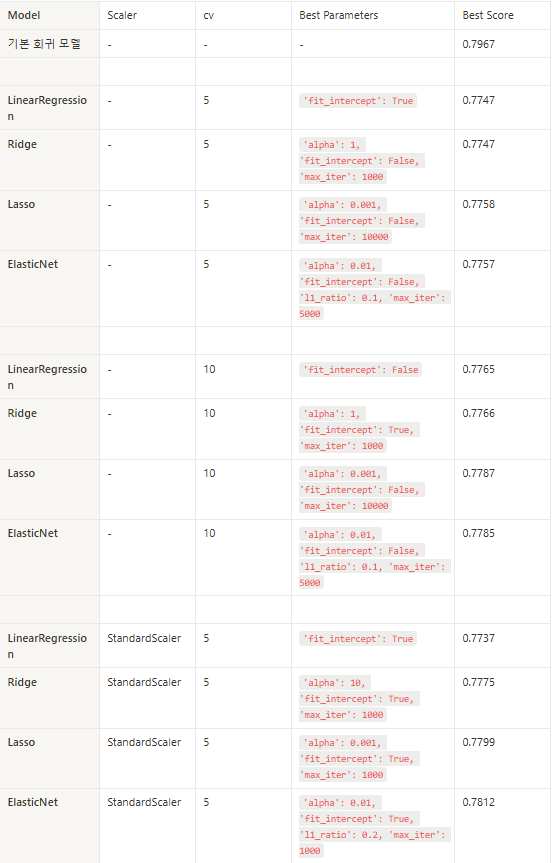

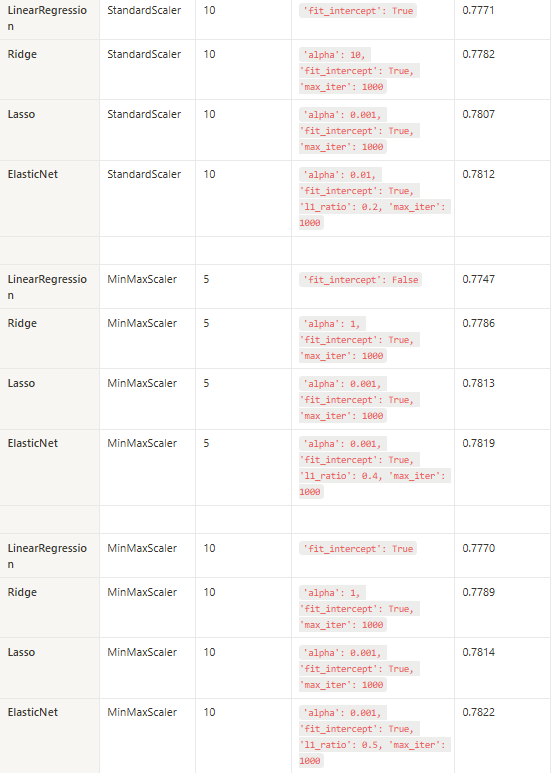

- 처음에 radnom state를 주지 않았을때는 scaler와 상관없이 cv=5 일때가 cv=10일때 보다, 성능이 약간(0.01이상) 높게 나왔다.
- cv=5는 전체 데이터를 5개의 폴드로 나누기 때문에,
- 한 번의 훈련에서 테스트 세트는 전체 데이터의 20%를 차지하고, 훈련 세트는 80%
- cv=10은 10개의 폴드로 나누어, 테스트 세트가 10%로 더 작아지고, 훈련 세트는 90%
- 따라서 cv=5는 테스트 데이터가 더 크고, 훈련 데이터는 더 적음
- 즉, cv=10은 각 폴드에서 테스트 데이터가 더 작고 훈련 데이터가 더 크기 때문에
- 모델이 데이터의 변동성에 덜 민감하게 훈련된다고 판단하였다.
- 하지만, random_state로 고정하고 나서 별 차이가 없어졌다.
- random_state와 상관없이 교차 검증을 하지 않은 기본 회귀 모델이 가장 성능 지표가 높고 변동이 큰것을 보면,
- 그래도 교차 검증을 하지 않으면 모델이 민감하게 반응 한다는것을 알 수 있다.

- 하이퍼파라미터를 살펴보자면, 이상치가 많이 없는 데이터라 그런지
- 스케일링 하지 않는것, Standard Scaler와 Minmax Scaler 간의 차이가 없었다.
- fit_intercept의 경우, True가 16, False가 14로 절반이었고
- alpha(규제강도)는 0.001~100까지 범위가 있었는데,
- Lasso 일때 0.001이 6번
- ElasticNet 일때 0.001이 2번 ,0.01이 4번
- Ridge 일때 1이 4번, 10이 2번으로 적은 표본이지만 규제별 최적의 강도범위가 나타났다.
- max_iter은 스케일링을 안했을때 Ridge에서는 1000, Lasso에서는 10000, ElasticNet에서는 5000번으로 최적의 해를 찾기위해 많은 반복을 했어야 했자만,
- 스케일링을 하면 1000번 반복(기본값이 1000)만으로도 최적의 해를 찾을 수 있었다.
- 스케일링을 하지 않은 경우와 Standard Scaler의 경우 l1_ratio가 0.1, 0.2로 낮게 나왔는데,
- L1규제가 낮고 L2규제가 높다는것은 중요하지 않은 특성들은 0에 가깝게 만든 비율이 높다는 것이다.
- Minmax Scaler의 경우 l1_ratio가 0.4, 0.5로 절반에 가까운 값이 나왔는데,
- 이는 l1규제와 l2규제를 비슷한 비율로 사용했다는 것이다.

## 분류 - 로지스틱 회귀

In [28]:
data1 = data.copy()

In [29]:
data1['Sleep efficiency'].describe()

count    452.000000
mean       0.788916
std        0.135237
min        0.500000
25%        0.697500
50%        0.820000
75%        0.900000
max        0.990000
Name: Sleep efficiency, dtype: float64

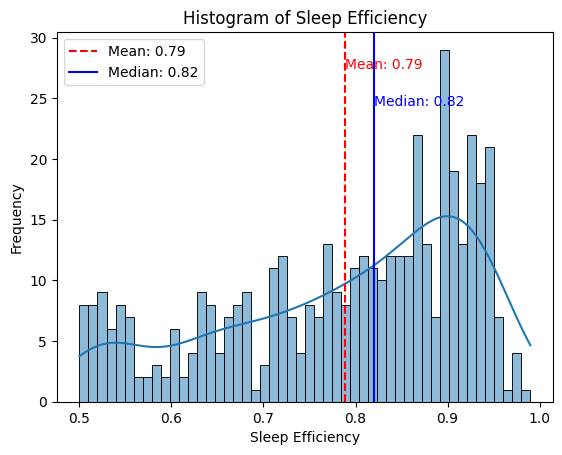

In [30]:
# 히스토그램
sns.histplot(data1['Sleep efficiency'], bins=50, kde=True)

mean_value = data1['Sleep efficiency'].mean()
median_value = data1['Sleep efficiency'].median()

plt.axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='blue', linestyle='-', label=f'Median: {median_value:.2f}')
plt.text(mean_value, plt.gca().get_ylim()[1] * 0.9, f'Mean: {mean_value:.2f}', color='red')
plt.text(median_value, plt.gca().get_ylim()[1] * 0.8, f'Median: {median_value:.2f}', color='blue')

plt.legend()
plt.title("Histogram of Sleep Efficiency")
plt.xlabel("Sleep Efficiency")
plt.ylabel("Frequency")
plt.show()

In [31]:
# 중앙값보다 높은 경우 1, 낮은 경우 0으로 변환
data1['Sleep efficiency'] = data1['Sleep efficiency'].apply(lambda x: 1 if x > median_value else 0)

data1[['Sleep efficiency']]

,Sleep efficiency
0,1
1,0
2,1
3,0
4,0
...,...
447,1
448,0
449,0
450,0


In [32]:
target = 'Sleep efficiency'
x1 = data1.drop(columns=target)
y1 = data1[target]

In [33]:
result = []

for i in range(100):
    x_train1, x_val1, y_train1, y_val1 = train_test_split(x1, y1, test_size=0.3)
    # 로지스틱 회귀 모델 선언
    logistic_model = LogisticRegression()
    
    # 모델 학습
    logistic_model.fit(x_train1, y_train1)
    
    # 검증 데이터에 대한 예측
    y_val1_pred = logistic_model.predict(x_val1)
    result.append(round(accuracy_score(y_val1, y_val1_pred),2))

# 성능 평가
print("Validation Accuracy:", accuracy_score(y_val1, y_val1_pred))
print("Confusion Matrix: \n", confusion_matrix(y_val1, y_val1_pred))
print("Classification Report:\n", classification_report(y_val1, y_val1_pred))
print(f"{result}")

Validation Accuracy: 0.8676470588235294
Confusion Matrix: 
 [[54 16]
 [ 2 64]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.77      0.86        70
           1       0.80      0.97      0.88        66

    accuracy                           0.87       136
   macro avg       0.88      0.87      0.87       136
weighted avg       0.88      0.87      0.87       136

[0.85, 0.86, 0.91, 0.9, 0.9, 0.88, 0.88, 0.93, 0.85, 0.86, 0.92, 0.83, 0.88, 0.88, 0.85, 0.86, 0.87, 0.87, 0.9, 0.88, 0.9, 0.81, 0.9, 0.9, 0.87, 0.85, 0.9, 0.89, 0.91, 0.89, 0.88, 0.9, 0.89, 0.9, 0.85, 0.89, 0.9, 0.88, 0.84, 0.85, 0.9, 0.9, 0.88, 0.88, 0.88, 0.9, 0.9, 0.89, 0.91, 0.88, 0.88, 0.87, 0.86, 0.89, 0.82, 0.85, 0.85, 0.9, 0.93, 0.9, 0.89, 0.86, 0.87, 0.9, 0.89, 0.85, 0.9, 0.88, 0.9, 0.91, 0.89, 0.91, 0.93, 0.88, 0.89, 0.86, 0.9, 0.82, 0.87, 0.84, 0.89, 0.85, 0.88, 0.86, 0.87, 0.9, 0.88, 0.92, 0.88, 0.85, 0.85, 0.92, 0.89, 0.86, 0.9, 0.92, 0.91, 0.85, 0.9

In [34]:
x_train1, x_val1, y_train1, y_val1 = train_test_split(x1, y1, test_size=0.3, random_state=1)

## 스케일링 x

In [35]:
# 각 규제 유형에 따른 하이퍼파라미터 설정
param_grids = {
    'Ridge': {
        'penalty': ['l2'],
        'solver': ['saga'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100], # 규제 강도 회귀의 alpha와 같다고 보면 됨
        'max_iter': [100, 300, 500, 1000]
    },
    'Lasso': {
        'penalty': ['l1'],
        'solver': ['saga'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'max_iter': [100, 300, 500, 1000]
    },
    'ElasticNet': {
        'penalty': ['elasticnet'],
        'solver': ['saga'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
        'max_iter': [100, 300, 500, 1000]
    }
}

# 반복문을 통해 각 규제 유형별로 최적의 하이퍼파라미터 찾기
for penalty, param_grid in param_grids.items():
    print(f"Running Grid Search for penalty: {penalty}")
    
    # GridSearchCV 설정
    grid_search = GridSearchCV(
        estimator=LogisticRegression(),
        param_grid=param_grid,
        cv=10,
        scoring='accuracy'
    )
    
    # 모델 학습
    grid_search.fit(x_train1, y_train1)
    
    # 최적의 파라미터와 점수 출력
    print(f"Best Parameters for penalty={penalty}:", grid_search.best_params_)
    print(f"Best Score for penalty={penalty}:", grid_search.best_score_)
    
    # 최적 모델로 검증 데이터 평가
    best_model = grid_search.best_estimator_
    y_val1_pred = best_model.predict(x_val1)
    accuracy = accuracy_score(y_val1, y_val1_pred)
    
    print("Validation Accuracy:", accuracy)
    print("Confusion Matrix:\n", confusion_matrix(y_val1, y_val1_pred))
    print("Classification Report:\n", classification_report(y_val1, y_val1_pred))
    print("-" * 50)

Running Grid Search for penalty: Ridge
Best Parameters for penalty=Ridge: {'C': 1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'saga'}
Best Score for penalty=Ridge: 0.813508064516129
Validation Accuracy: 0.8088235294117647
Confusion Matrix:
 [[49 19]
 [ 7 61]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.72      0.79        68
           1       0.76      0.90      0.82        68

    accuracy                           0.81       136
   macro avg       0.82      0.81      0.81       136
weighted avg       0.82      0.81      0.81       136

--------------------------------------------------
Running Grid Search for penalty: Lasso
Best Parameters for penalty=Lasso: {'C': 1, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}
Best Score for penalty=Lasso: 0.813508064516129
Validation Accuracy: 0.8088235294117647
Confusion Matrix:
 [[49 19]
 [ 7 61]]
Classification Report:
               precision    recall  f1-score   supp

## StandardScaler 사용

In [36]:
# 스케일링 적용
scaler = StandardScaler()
x_train1_scaled = scaler.fit_transform(x_train1)
x_val1_scaled = scaler.transform(x_val1)

# 각 규제 유형에 따른 하이퍼파라미터 설정
param_grids = {
    'Ridge': {
        'penalty': ['l2'],
        'solver': ['saga'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'max_iter': [100, 300, 500, 1000]
    },
    'Lasso': {
        'penalty': ['l1'],
        'solver': ['saga'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'max_iter': [100, 300, 500, 1000]
    },
    'ElasticNet': {
        'penalty': ['elasticnet'],
        'solver': ['saga'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
        'max_iter': [100, 300, 500, 1000]
    }
}

# 반복문을 통해 각 규제 유형별로 최적의 하이퍼파라미터 찾기
for penalty, param_grid in param_grids.items():
    print(f"Running Grid Search for penalty: {penalty}")
    
    # GridSearchCV 설정
    grid_search = GridSearchCV(
        estimator=LogisticRegression(),
        param_grid=param_grid,
        cv=10,
        scoring='accuracy'
    )
    
    # 모델 학습
    grid_search.fit(x_train1_scaled, y_train1)
    
    # 최적의 파라미터와 점수 출력
    print(f"Best Parameters for penalty={penalty}:", grid_search.best_params_)
    print(f"Best Score for penalty={penalty}:", grid_search.best_score_)
    
    # 최적 모델로 검증 데이터 평가
    best_model = grid_search.best_estimator_
    y_val1_pred = best_model.predict(x_val1_scaled)
    accuracy = accuracy_score(y_val1, y_val1_pred)
    
    print("Validation Accuracy:", accuracy)
    print("Confusion Matrix:\n", confusion_matrix(y_val1, y_val1_pred))
    print("Classification Report:\n", classification_report(y_val1, y_val1_pred))
    print("-" * 50)

Running Grid Search for penalty: Ridge
Best Parameters for penalty=Ridge: {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
Best Score for penalty=Ridge: 0.8793346774193548
Validation Accuracy: 0.8823529411764706
Confusion Matrix:
 [[59  9]
 [ 7 61]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88        68
           1       0.87      0.90      0.88        68

    accuracy                           0.88       136
   macro avg       0.88      0.88      0.88       136
weighted avg       0.88      0.88      0.88       136

--------------------------------------------------
Running Grid Search for penalty: Lasso
Best Parameters for penalty=Lasso: {'C': 100, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Best Score for penalty=Lasso: 0.8793346774193548
Validation Accuracy: 0.8823529411764706
Confusion Matrix:
 [[59  9]
 [ 7 61]]
Classification Report:
               precision    recall  f1-score   s

## MinMaxScaler 사용

In [37]:
# 스케일링 적용
scaler = MinMaxScaler()
x_train1_scaled = scaler.fit_transform(x_train1)
x_val1_scaled = scaler.transform(x_val1)

# 각 규제 유형에 따른 하이퍼파라미터 설정
param_grids = {
    'Ridge': {
        'penalty': ['l2'],
        'solver': ['saga'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'max_iter': [100, 300, 500, 1000]
    },
    'Lasso': {
        'penalty': ['l1'],
        'solver': ['saga'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'max_iter': [100, 300, 500, 1000]
    },
    'ElasticNet': {
        'penalty': ['elasticnet'],
        'solver': ['saga'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
        'max_iter': [100, 300, 500, 1000]
    }
}

# 반복문을 통해 각 규제 유형별로 최적의 하이퍼파라미터 찾기
for penalty, param_grid in param_grids.items():
    print(f"Running Grid Search for penalty: {penalty}")
    
    # GridSearchCV 설정
    grid_search = GridSearchCV(
        estimator=LogisticRegression(),
        param_grid=param_grid,
        cv=10,
        scoring='accuracy'
    )
    
    # 모델 학습
    grid_search.fit(x_train1_scaled, y_train1)
    
    # 최적의 파라미터와 점수 출력
    print(f"Best Parameters for penalty={penalty}:", grid_search.best_params_)
    print(f"Best Score for penalty={penalty}:", grid_search.best_score_)
    
    # 최적 모델로 검증 데이터 평가
    best_model = grid_search.best_estimator_
    y_val1_pred = best_model.predict(x_val1_scaled)
    accuracy = accuracy_score(y_val1, y_val1_pred)
    
    print("Validation Accuracy:", accuracy)
    print("Confusion Matrix:\n", confusion_matrix(y_val1, y_val1_pred))
    print("Classification Report:\n", classification_report(y_val1, y_val1_pred))
    print("-" * 50)

Running Grid Search for penalty: Ridge
Best Parameters for penalty=Ridge: {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
Best Score for penalty=Ridge: 0.8793346774193548
Validation Accuracy: 0.875
Confusion Matrix:
 [[58 10]
 [ 7 61]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87        68
           1       0.86      0.90      0.88        68

    accuracy                           0.88       136
   macro avg       0.88      0.88      0.87       136
weighted avg       0.88      0.88      0.87       136

--------------------------------------------------
Running Grid Search for penalty: Lasso
Best Parameters for penalty=Lasso: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Best Score for penalty=Lasso: 0.8825604838709677
Validation Accuracy: 0.9044117647058824
Confusion Matrix:
 [[60  8]
 [ 5 63]]
Classification Report:
               precision    recall  f1-score   support

     

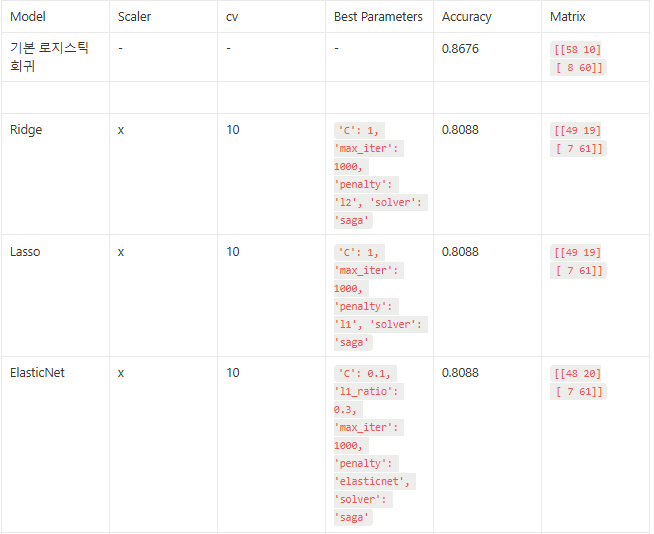

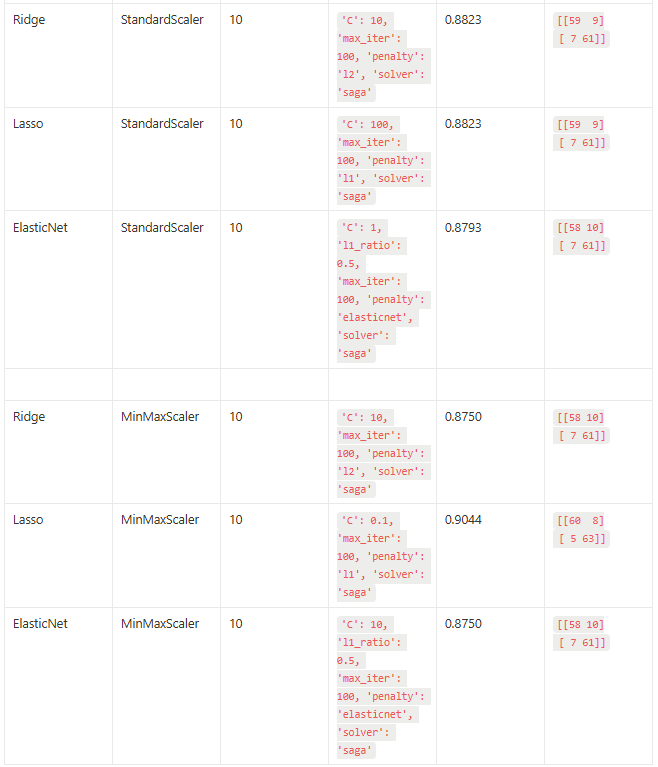

- 로지스틱 회귀 모델에서 가장 크게 눈에 띄는 성능은 스케일링을 하지 않았을 때와 스케일링을 하였을때, 성능차이가 많이 난다는 것이다.
- 스케일링을 하지 않고 규제를 가했을때, 0.80에 가까운 정확도를 보였지만, 스케일링을 한 후 규제를 가했을때는 0.88에 가까운 정확도를 보여주었다.
- 하지만 스케일링과 규제, 교차 검증을 하지 않은 기본 모델이 높을 정확도를 보여주었는데,
- 이는 이미 데이터의 스케일이 비슷하고, 과적합을 방지하는데 유리한 규제가, 데이터가 복잡하지 않아 오히려 성능 저하를 일으켰다고도 볼 수 있다.
- 교차 검증을 하지 않았기 때문에 데이터의 변동성은 어느 정도 있더라도, Sleep Efficiency 데이터가 복잡하지 않고, 특성의 수가 적다고도 볼 수 있다.